Shape of the data: (17898, 9)
Distribution of class variables:
 target_class
0    16259
1     1639
Name: count, dtype: int64
Missing values in the data:
  Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64


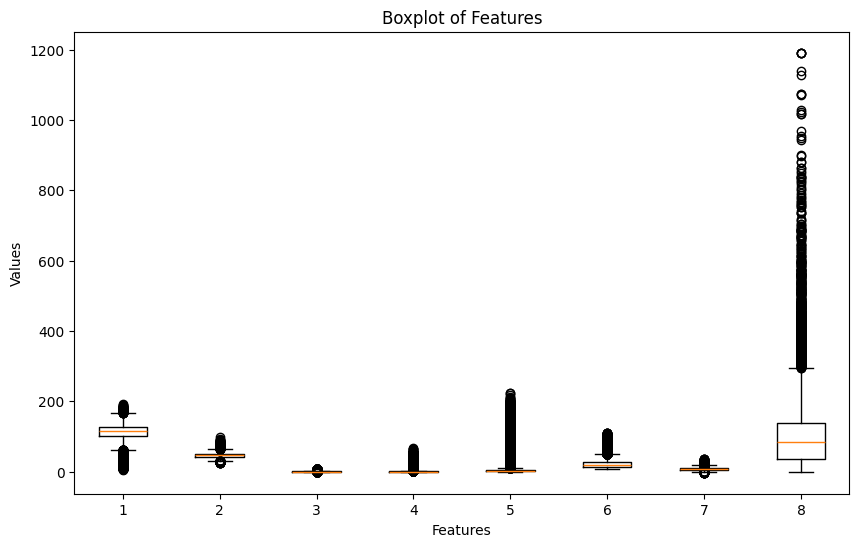

Accuracy for default model: 0.9731843575418995


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


data = pd.read_csv("pulsar-stars.csv")

# (a) 
print("Shape of the data:", data.shape)

# (b) 
features = data.drop('target_class', axis=1)
target = data['target_class']

# (c) 
class_distribution = data['target_class'].value_counts()
print("Distribution of class variables:\n", class_distribution)

# (d) 
missing_values = data.isnull().sum()
print("Missing values in the data:\n", missing_values)

# (e) 
plt.figure(figsize=(10, 6))
plt.boxplot(features.values)
plt.title("Boxplot of Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

# (f) 
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# (g) 
model_default = SVC()
model_default.fit(X_train, Y_train)

# (h) 
accuracy_default = accuracy_score(Y_test, model_default.predict(X_test))
print("Accuracy for default model:", accuracy_default)

# (i) 
parameters = {'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'C': [1.0, 100.0, 1000.0]}
grid_search = GridSearchCV(SVC(), parameters, cv=5)
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# (j) 
best_model = grid_search.best_estimator_
Y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(Y_test, Y_pred_best)
print("Accuracy for best model:", accuracy_best)
